In [100]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
import joblib
import dateparser

In [59]:
df_original=pd.read_csv('BDD_original.csv')
df_vizz=df_original.copy()
df_vizz['datetime'] = pd.to_datetime(df_vizz['datetime'])
df_vizz['Date fin alarmes'] = pd.to_datetime(df_vizz['Date fin alarmes'])
df_vizz['Durée'] = pd.to_timedelta(df_vizz['Durée'])

**Step 3 : Data visualization**

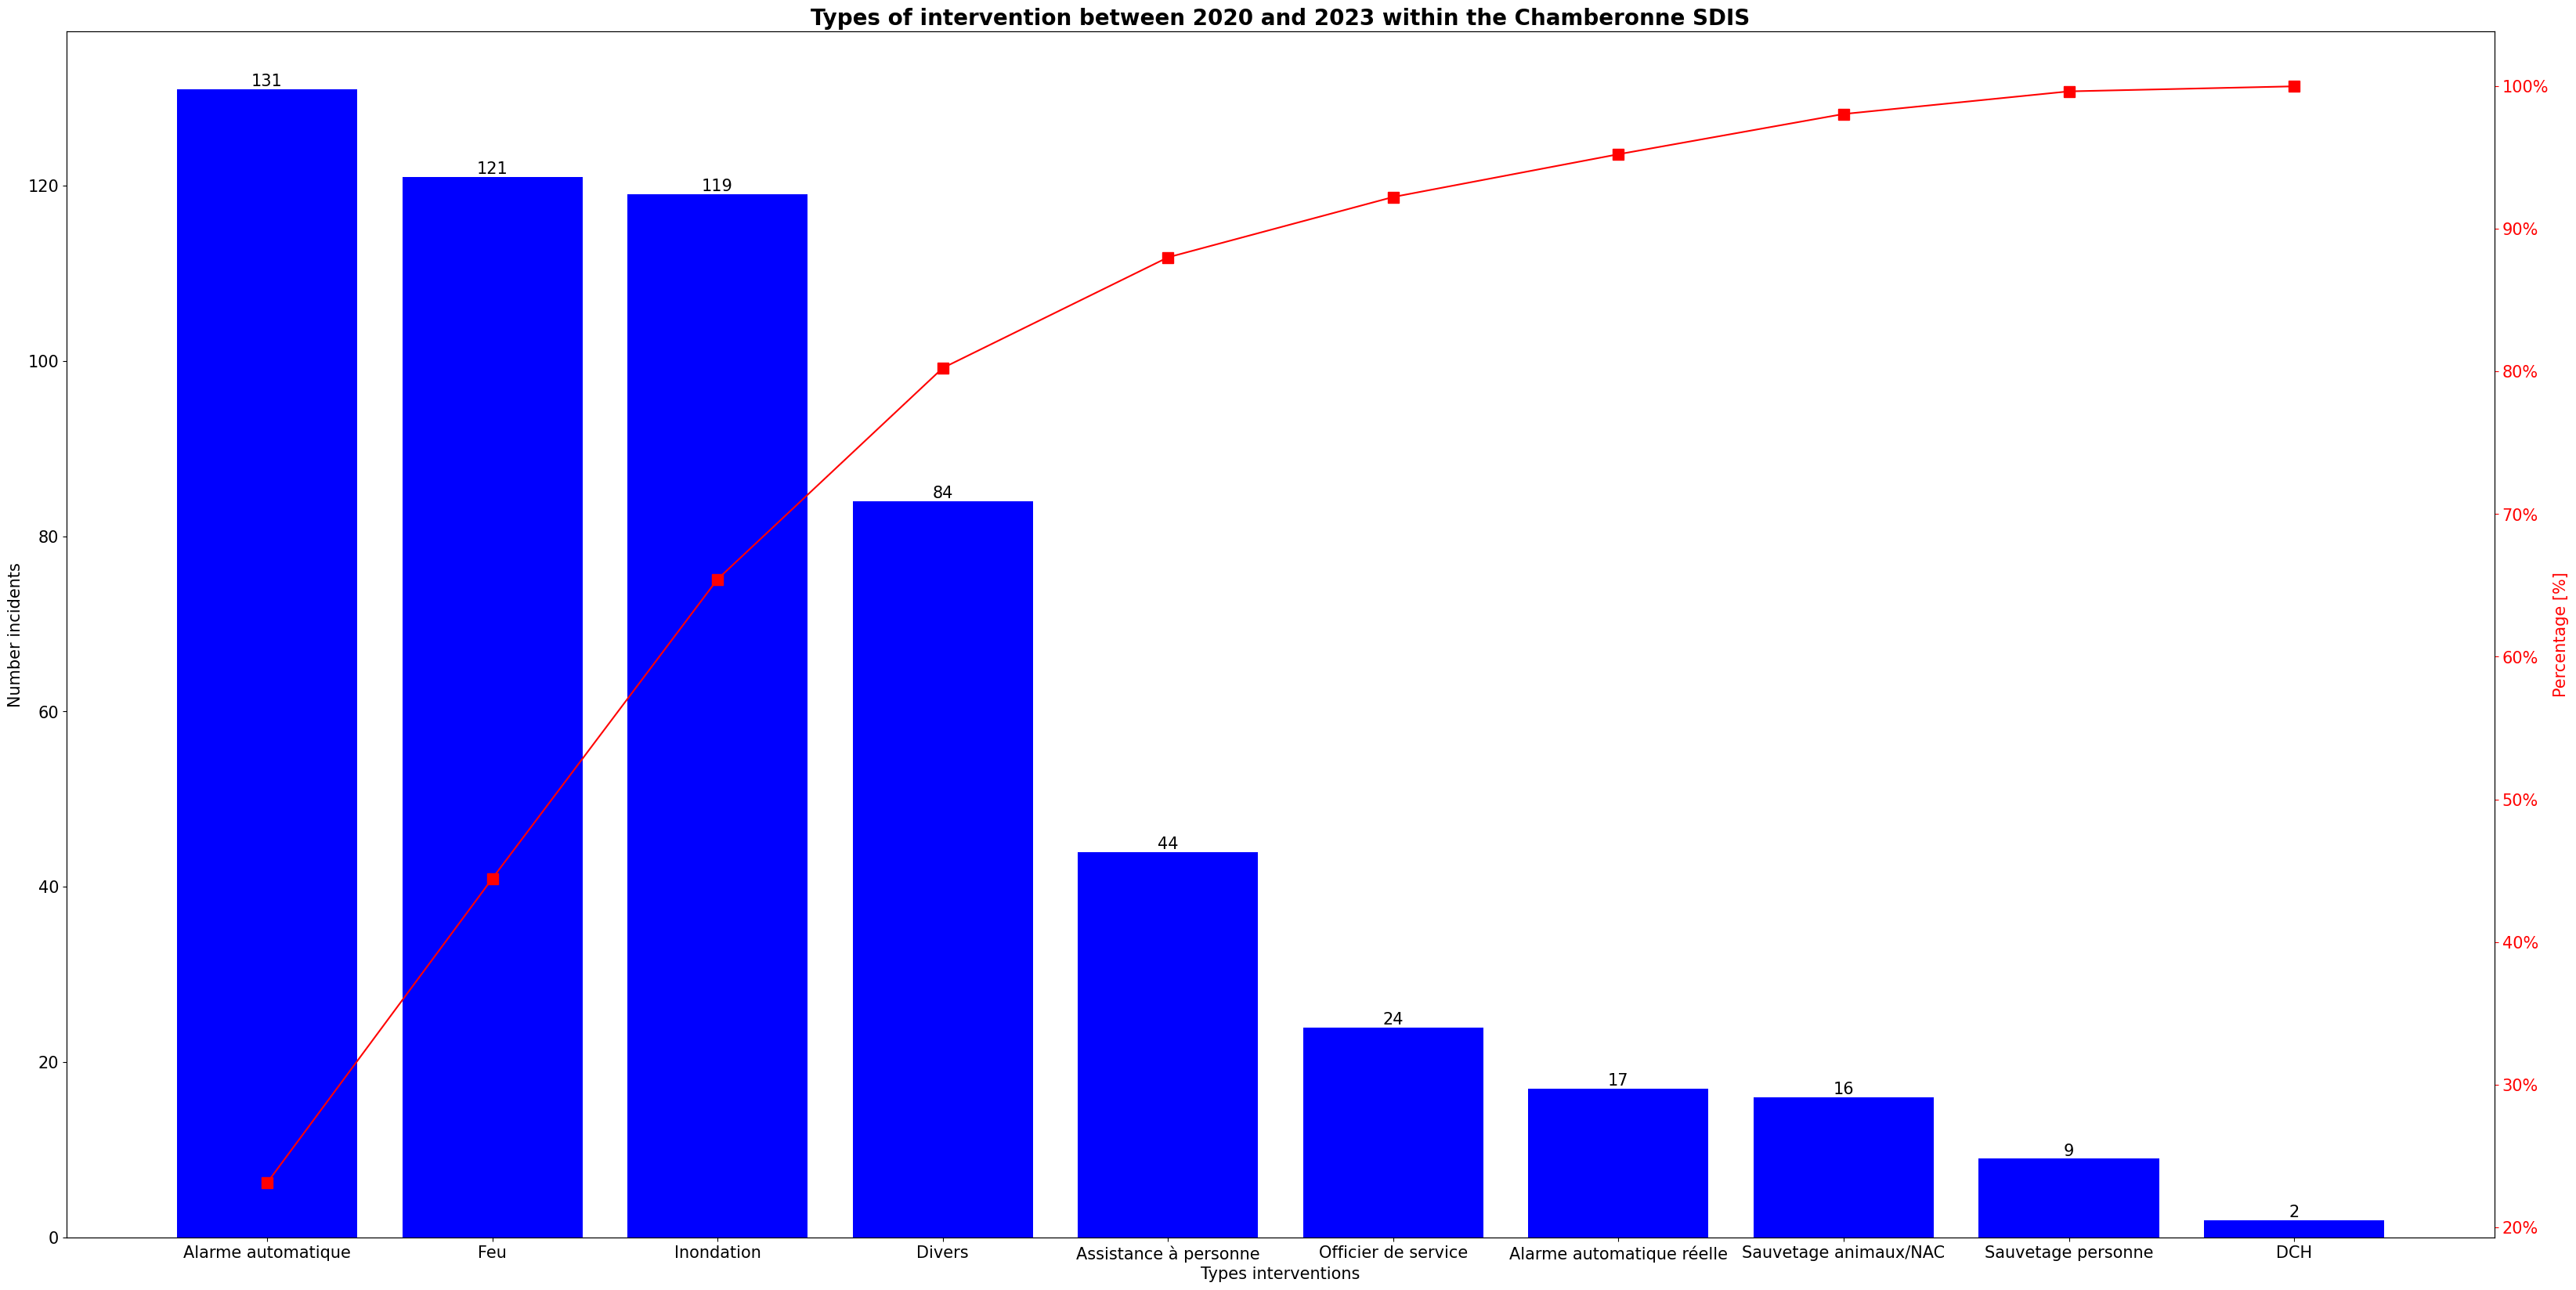

In [60]:
#Plotting proportion of interventions by type of intervention (Pareto Diagram)
counts_by_type = df_vizz[df_vizz['Type'] != 'Aucun'].groupby('Type').size().sort_values(ascending=False)
index=counts_by_type.index
cumul_pourcentage=counts_by_type.cumsum()/counts_by_type.sum()*100

fig, ax = plt.subplots(figsize=(40,20))
ax.bar(index,counts_by_type,color='blue')
ax2=ax.twinx()
ax2.plot(index,cumul_pourcentage, color='red',marker="s", ms=10)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax.tick_params(axis="y", labelsize=15)
ax.tick_params(axis="x", labelsize=15)
ax2.tick_params(axis="y", colors="red",labelsize=15)
ax.bar_label(ax.bar(index,counts_by_type,color='blue'), fontsize=15)
ax.set_ylabel('Number incidents', fontsize=15)
ax2.set_ylabel('Percentage [%]', color='red', fontsize=15)
ax.set_xlabel('Types interventions', fontsize=15)
plt.title("Types of intervention between 2020 and 2023 within the Chamberonne SDIS", fontsize=20,fontweight="bold")
plt.show()

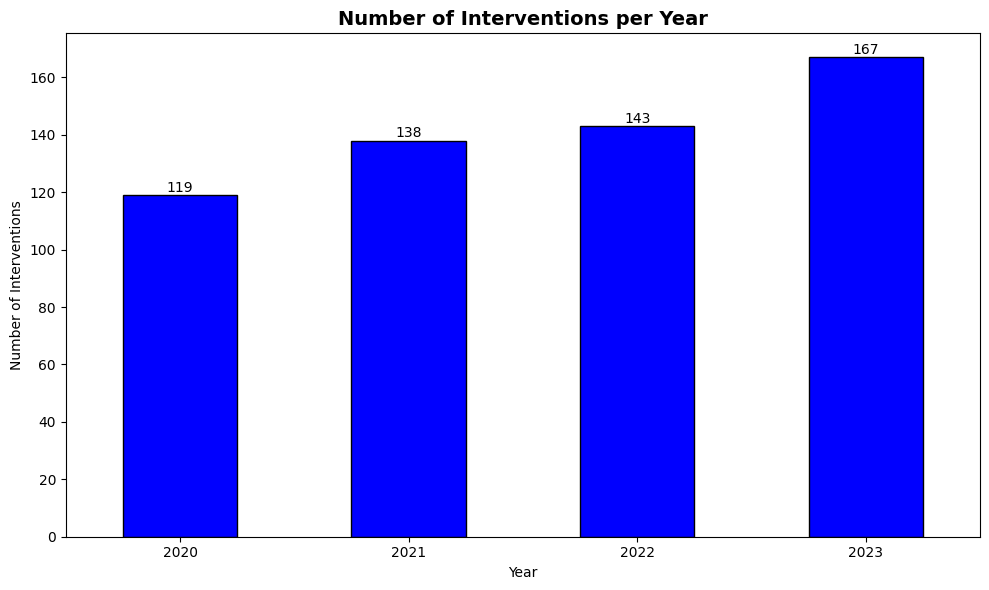

In [61]:
#Plotting number of interventions per year
df_vizz['year'] = df_vizz['datetime'].dt.year
interventions_per_year = df_vizz[df_vizz['Intervention'] == 1]['year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
interventions_per_year.plot(kind='bar', color='blue', edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Number of Interventions')
plt.title("Number of Interventions per Year", fontsize=14, fontweight="bold")

for i, v in enumerate(interventions_per_year):
    plt.text(i, v + 0.1, str(v), ha='center', va='bottom')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

C:\Users\Manon Pesme\AppData\Local\Temp\ipykernel_22108\2332810531.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '16.2' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  year_week_scaled['Semaine'] /= 5


<Figure size 1000x500 with 0 Axes>

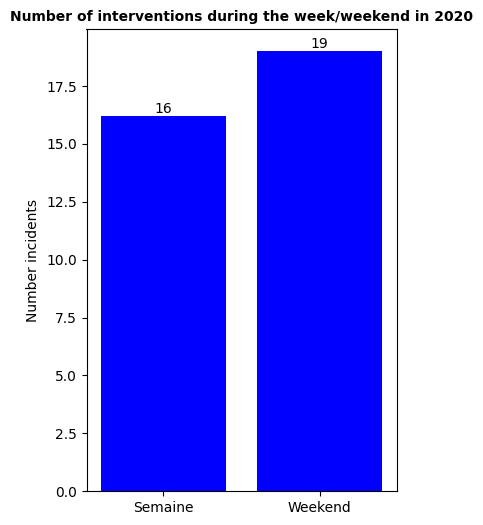

C:\Users\Manon Pesme\AppData\Local\Temp\ipykernel_22108\2332810531.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '16.6' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  year_week_scaled['Semaine'] /= 5


<Figure size 1000x500 with 0 Axes>

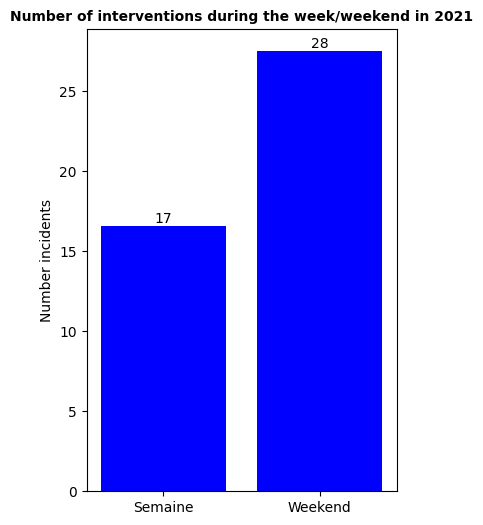

C:\Users\Manon Pesme\AppData\Local\Temp\ipykernel_22108\2332810531.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '20.2' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  year_week_scaled['Semaine'] /= 5


<Figure size 1000x500 with 0 Axes>

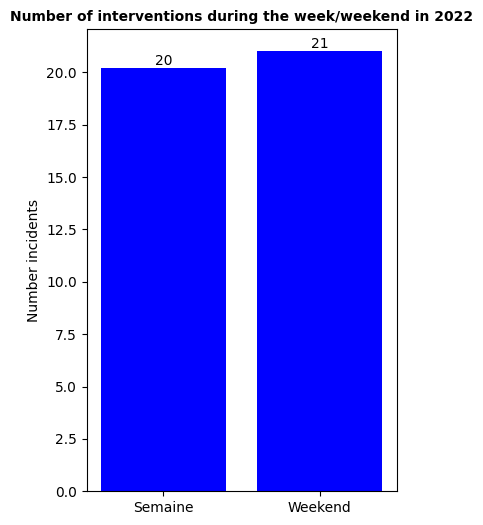

C:\Users\Manon Pesme\AppData\Local\Temp\ipykernel_22108\2332810531.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '28.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  year_week_scaled['Weekend'] /= 2


<Figure size 1000x500 with 0 Axes>

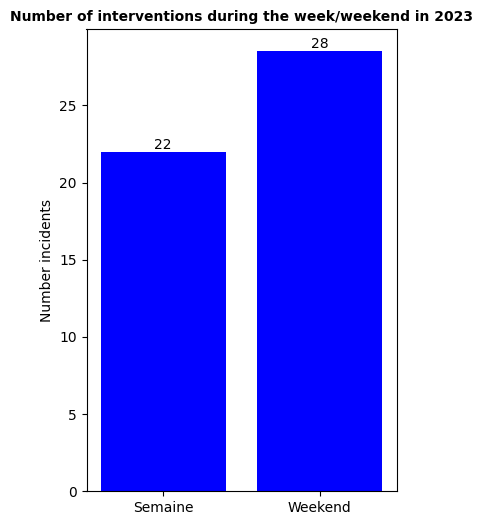

In [62]:
#Plotting proportion of operations at weekends for each year
def bar_by_year_week(year) : 
    df_year = df_vizz[df_vizz['Year'] == year]
    plt.figure(figsize=(10, 5))
    year_week = df_year.groupby(['Weekend']).size().sort_values(ascending=False)
    name={0.0:'Semaine',1.0:'Weekend'}
    year_week.index= year_week.index.to_series().map(name)

    year_week_scaled = year_week.copy()
    year_week_scaled['Semaine'] /= 5
    year_week_scaled['Weekend'] /= 2

    plt.figure(figsize=(4, 6))
    bars = plt.bar(year_week_scaled.index,year_week_scaled,color='blue')
    for bar, count in zip(bars,year_week_scaled):
        plt.text(bar.get_x() + bar.get_width() / 2, count, f"{count:.0f}", ha='center', va='bottom', fontsize=10)
    plt.ylabel('Number incidents')
    plt.title(f"Number of interventions during the week/weekend in {year}",fontsize=10,fontweight="bold")
    plt.show()

bar_by_year_week(2020)
bar_by_year_week(2021)
bar_by_year_week(2022)
bar_by_year_week(2023)

<Figure size 1500x1000 with 0 Axes>

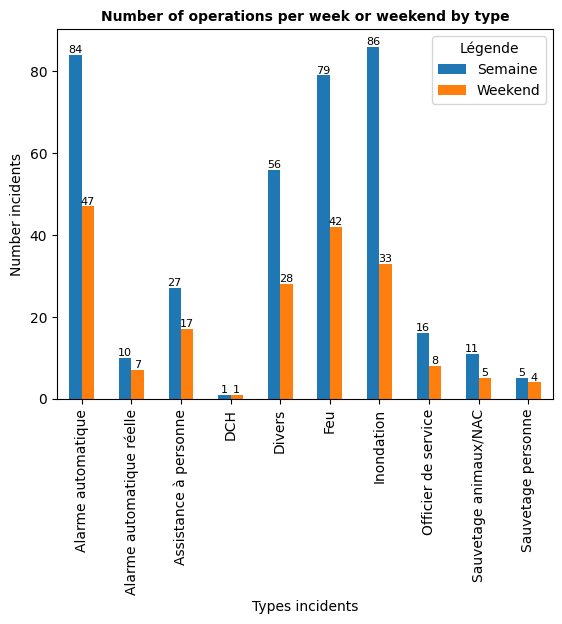

In [63]:
#Plotting proportion by type of intervention
type_weekend=df_vizz[df_vizz['Type'] != 'Aucun'].groupby(['Type','Weekend']).size()
type_weekend.index = type_weekend.index.set_levels(type_weekend.index.levels[1].map({0.0: 'Semaine', 1.0: 'Weekend'}), level=1)
plt.figure(figsize=(15, 10))
bars = type_weekend.unstack().plot(kind='bar', stacked=False)
for container in bars.containers:
    for bar in container:
        height = bar.get_height()
        plt.annotate('{}'.format(height),
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     ha='center', va='bottom', fontsize=8)

plt.legend(title='Légende')
plt.xlabel('Types incidents')
plt.ylabel('Number incidents')
plt.title('Number of operations per week or weekend by type',fontsize=10,fontweight="bold")
plt.show()

Text(0.5, 1.0, 'Number of interventions for each municipality between 2020 and 2023')

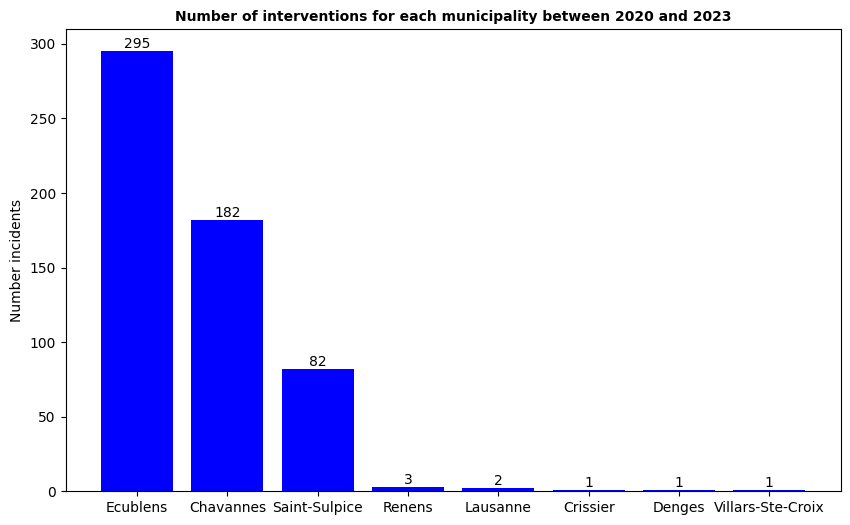

In [64]:
#Plotting proportion of interventions by municipality
commune = df_vizz.groupby(['Commune']).size().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
bars = plt.bar(commune.index,commune,color='blue')
for bar, count in zip(bars,commune):
    plt.text(bar.get_x() + bar.get_width() / 2, count, str(count), ha='center', va='bottom', fontsize=10)
plt.ylabel('Number incidents')
plt.title('Number of interventions for each municipality between 2020 and 2023',fontsize=10,fontweight="bold")

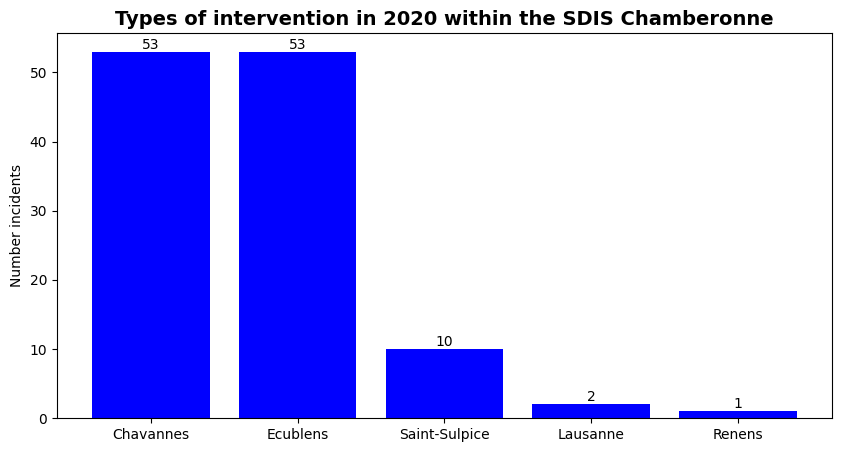

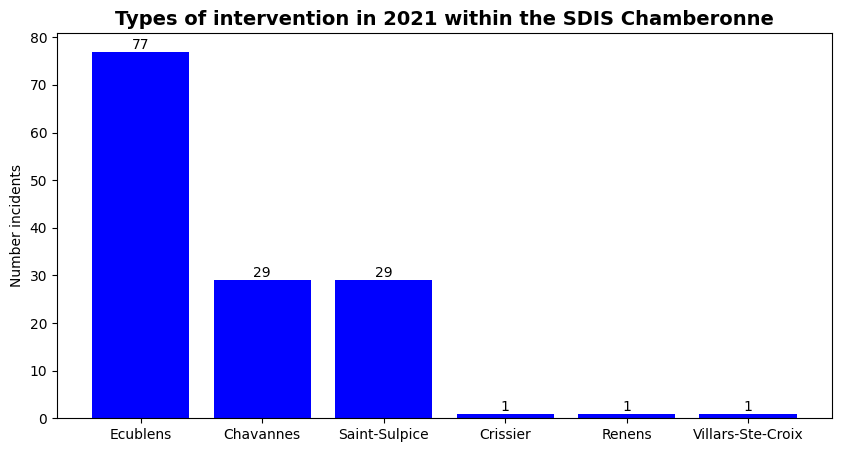

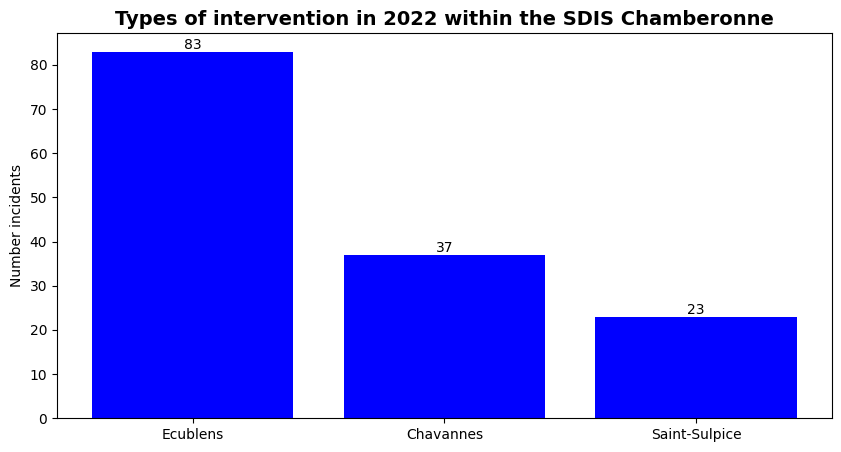

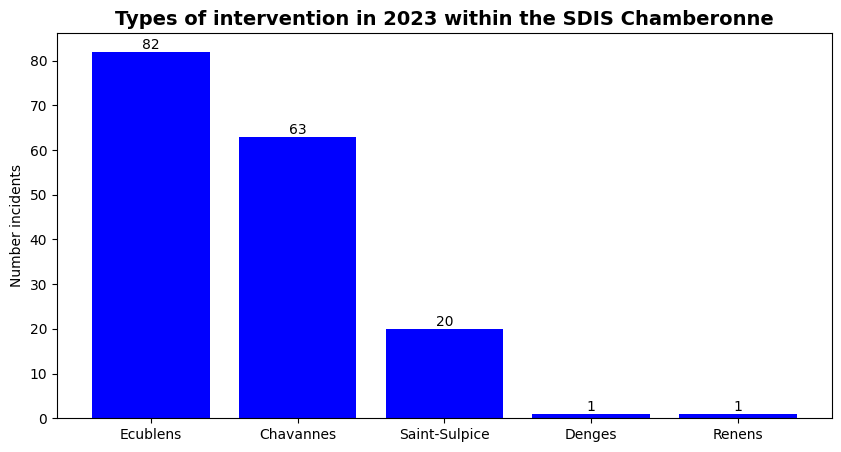

In [65]:
#Plotting operations by municipality for each year 
def bar_by_year_commune(year) : 
    df_year = df_vizz[df_vizz['Year'] == year]
    plt.figure(figsize=(10, 5))
    year_commune = df_year.groupby(['Commune']).size().sort_values(ascending=False)
    bars = plt.bar(year_commune.index,year_commune,color='blue')
    for bar, count in zip(bars,year_commune):
        plt.text(bar.get_x() + bar.get_width() / 2, count, str(count), ha='center', va='bottom', fontsize=10)
    plt.ylabel('Number incidents')
    plt.title(f"Types of intervention in {year} within the SDIS Chamberonne", fontsize=14, fontweight="bold")
    plt.show()

bar_by_year_commune(2020)
bar_by_year_commune(2021)
bar_by_year_commune(2022)
bar_by_year_commune(2023)

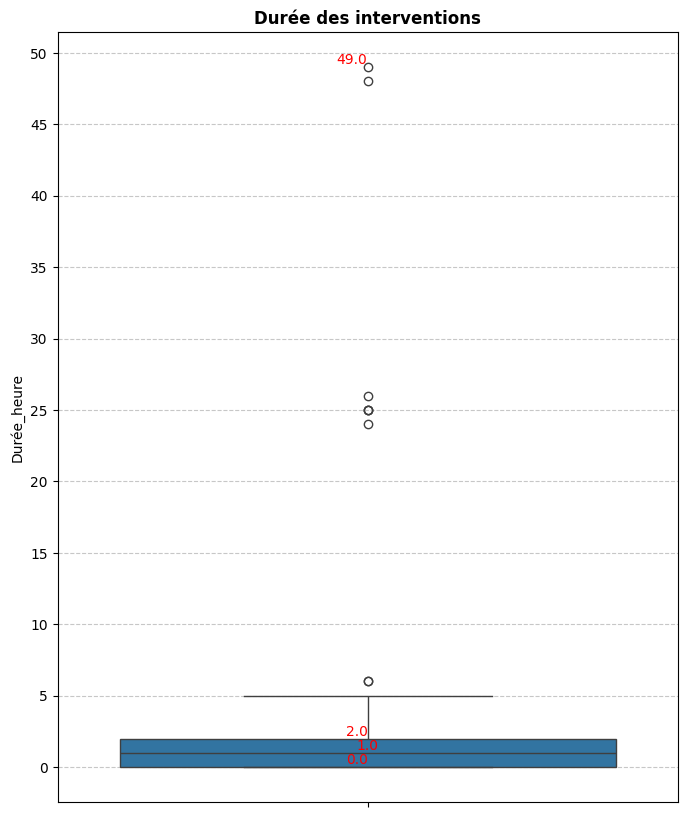

In [66]:
#Plotting distribution of intervention times
df_vizz['Durée_sec'] = df_vizz['Durée'].dt.total_seconds()
df_vizz['Durée_heure']=df_vizz['Durée_sec']//3600
plt.figure(figsize=(8, 10))

sns.boxplot(y=df_vizz['Durée_heure']).set_title('Durée des interventions',fontsize=12,fontweight="bold")
plt.yticks([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])
q1 = df_vizz['Durée_heure'].quantile(0.25)
q3 = df_vizz['Durée_heure'].quantile(0.75)
median = df_vizz['Durée_heure'].median()
min_value = df_vizz['Durée_heure'].min()
max_value = df_vizz['Durée_heure'].max()

#Addition of labels for Q1, Q3, median and extreme values
plt.text(0, q1, q1, ha='right', va='bottom', color='red')
plt.text(0, q3, q3, ha='right', va='bottom', color='red')
plt.text(0, median, median, ha='center', va='bottom', color='red')
plt.text(0, max_value, max_value, ha='right', va='bottom', color='red')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Step 4 : Classifier Selection and Training**

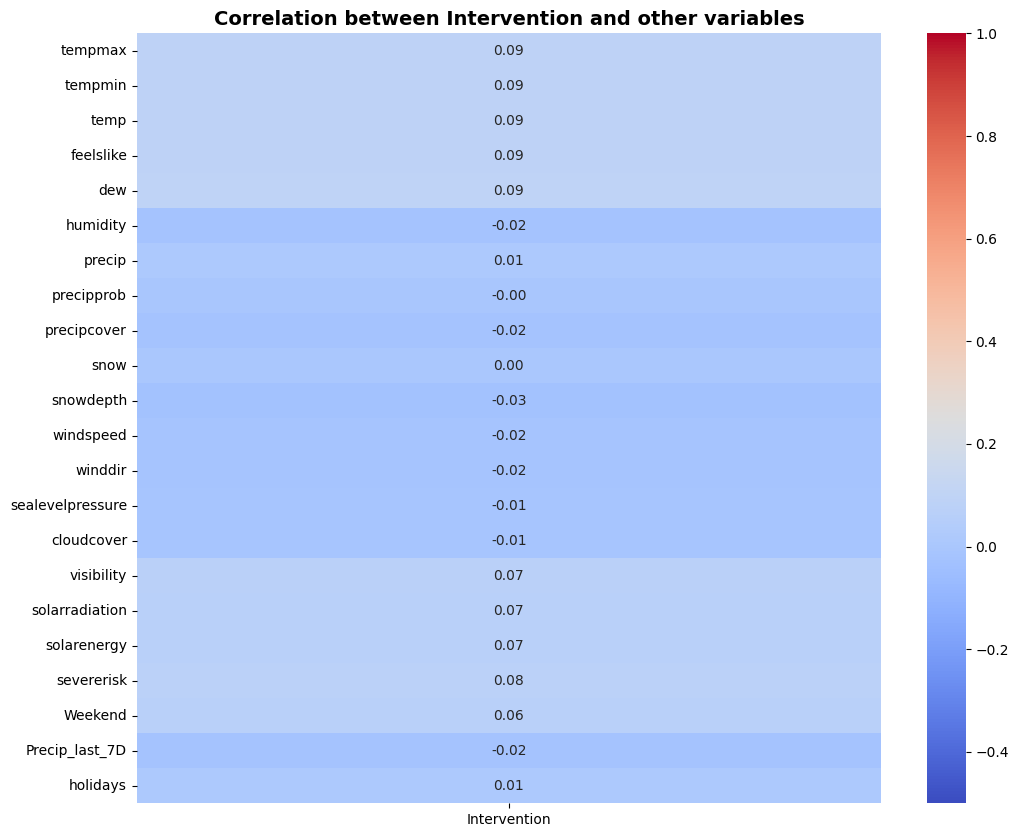

In [67]:
#Correlation between intervention and other variables
df1 = df_vizz.drop(['datetime', 'Heure début alarmes', 'Date fin alarmes',
       'Heure fin alarmes', 'Type', 'Commune', 'year','Year',
       'Alarme automatique', 'Alarme automatique réelle',
       'Assistance à personne', 'DCH', 'Divers', 'Feu', 'Inondation',
       'Officier de service', 'Sauvetage animaux/NAC', 'Sauvetage personne','preciptype',
       'conditions','description','Durée','Durée_sec','Durée_heure'], axis=1)

#Correlation Matrix Calculation
corr_matrix = df1.corr()
intervention_correlation = corr_matrix['Intervention']
intervention_correlation = intervention_correlation.drop('Intervention')

#Heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(intervention_correlation.to_frame(), annot=True, cmap='coolwarm', fmt=".2f", cbar=True, vmin=-0.5, vmax=1)
heatmap.set_title('Correlation between Intervention and other variables', fontsize=14, fontweight="bold")

plt.show()


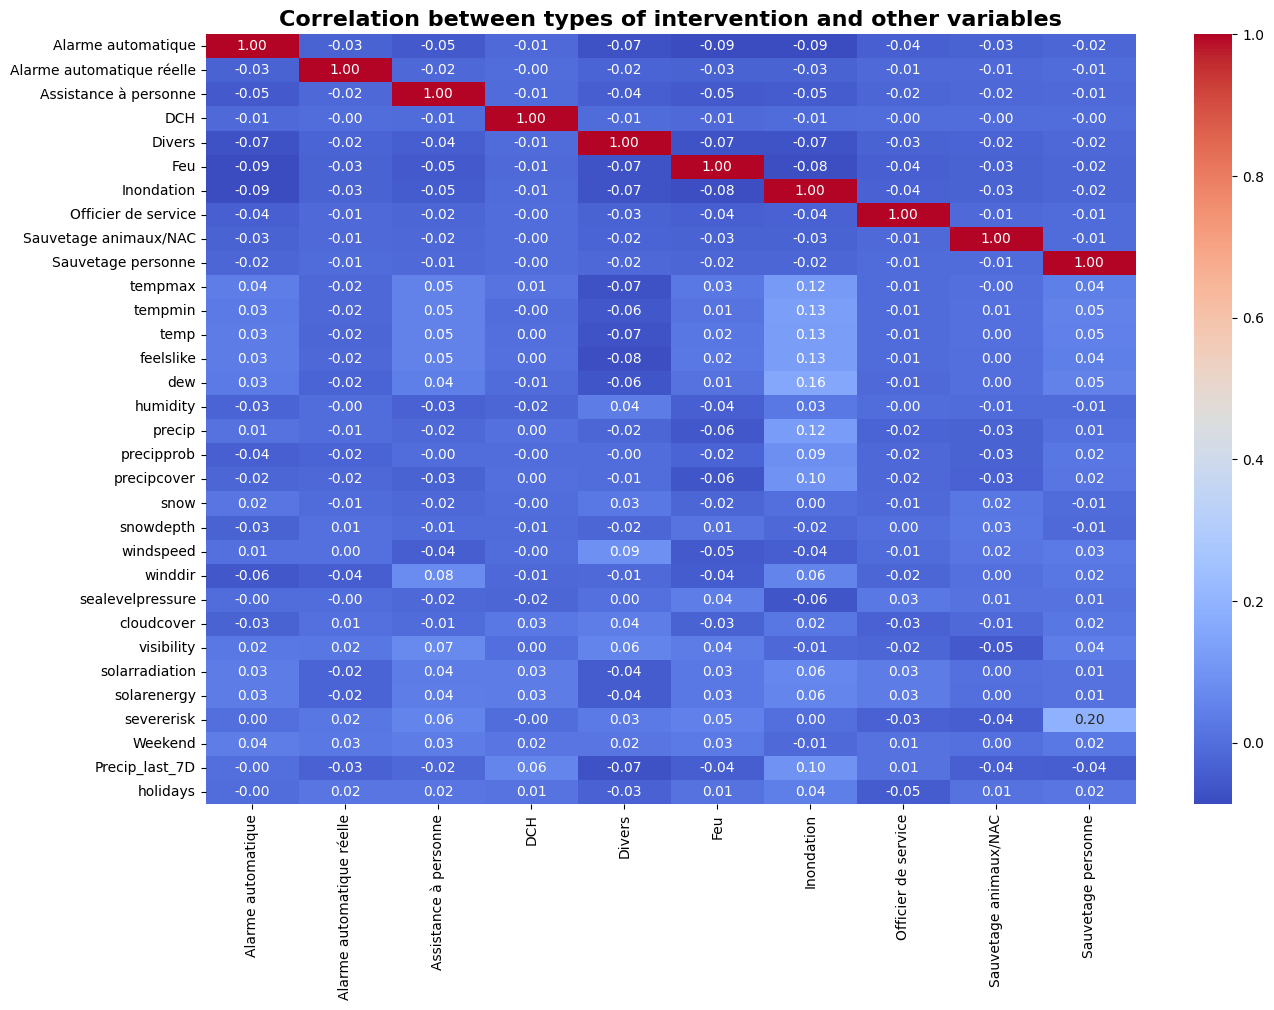

In [68]:
#Correlation between types of intervention and other variables
df2 = df_vizz.drop(['datetime', 'Heure début alarmes', 'Date fin alarmes','Year',
       'Heure fin alarmes', 'Type', 'Commune', 'year','Intervention',
       'preciptype','conditions','description','Durée','Durée_sec','Durée_heure'], axis=1)

#Correlation Matrix Calculation
corr_matrix = df2.corr()
types_intervention = ['Alarme automatique', 'Alarme automatique réelle',
                      'Assistance à personne', 'DCH', 'Divers', 'Feu', 'Inondation',
                      'Officier de service', 'Sauvetage animaux/NAC', 'Sauvetage personne']
corr_matrix_transposed = corr_matrix[types_intervention]

#Heatmap of the correlation matrix
plt.figure(figsize=(15, 10))
heatmap = sns.heatmap(corr_matrix_transposed, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
heatmap.set_title("Correlation between types of intervention and other variables", fontsize=16, fontweight="bold")
plt.show()

**Step 5 : Model Evaluation**  
**5.1 Classification by type of intervention (yes or not)**  
Method 1 : RandomForestClassifier

In [69]:
#Modeling Random Forest Classifier for the prediction of the type of intervention
X = df_vizz.drop(['datetime', 'Heure début alarmes', 'Date fin alarmes',
       'Heure fin alarmes', 'Commune', 'Year','Intervention',
       'preciptype','conditions','description','Alarme automatique','Alarme automatique réelle',
        'Assistance à personne', 'DCH', 'Divers','Type', 'Feu','Inondation','Officier de service', 
        'Sauvetage animaux/NAC', 'Sauvetage personne','Durée','Durée_sec','Durée_heure'], axis=1)

unique_types = df_vizz['Type'].unique()

#Associate each type of unique intervention with an integer between 0 and 10
type_mapping = {
    'Aucun': 0,
    'Feu': 1,
    'Alarme automatique': 2,
    'Sauvetage personne':3,
    'Inondation':4,
    'Divers': 5,
    'Sauvetage animaux/NAC':6,
    'Alarme automatique réelle': 7,
    'Officier de service':8,
    'Assistance à personne':9,
    'DCH':10
   }

#Replace the types of interventions with the integers
df_vizz['Type'] = df_vizz['Type'].map(type_mapping).astype(int)
Y = df_vizz['Type']

#Splitting the dataset into training and testing sets
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=42,test_size=0.3)
rfc=RandomForestClassifier(random_state=42,n_estimators=10)

#Fitting the model
rfc.fit(X_train,Y_train)

#Predictions
rfc_pred=rfc.predict(X_test)
print("Confusion Matrix (before scaling):")
print(confusion_matrix(Y_test,rfc_pred))
print("\nClassification Report (before scaling):")
print(classification_report(Y_test,rfc_pred))

Confusion Matrix (before scaling):
[[286   2   5   0   2   0   0   0   0   0]
 [ 33   2   2   0   4   3   0   1   1   1]
 [ 30   1   0   0   0   4   0   0   1   0]
 [  2   0   0   0   0   0   0   0   0   0]
 [ 23   3   2   0   9   2   0   0   0   0]
 [ 19   2   0   1   4   4   0   0   0   0]
 [  2   1   0   0   0   0   0   0   0   0]
 [  5   0   0   0   0   0   0   0   0   0]
 [  3   0   0   0   0   1   0   0   0   0]
 [  9   1   0   0   0   1   0   1   0   1]]

Classification Report (before scaling):
              precision    recall  f1-score   support

           0       0.69      0.97      0.81       295
           1       0.17      0.04      0.07        47
           2       0.00      0.00      0.00        36
           3       0.00      0.00      0.00         2
           4       0.47      0.23      0.31        39
           5       0.27      0.13      0.18        30
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         5
      

c:\Users\Manon Pesme\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Manon Pesme\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Manon Pesme\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

Method 2 : KNN

In [70]:
#Modeling Knn Classifier for the prediction of the type of intervention
X = df_vizz.drop(['datetime', 'Heure début alarmes', 'Date fin alarmes',
       'Heure fin alarmes', 'Commune', 'Year','Intervention',
       'preciptype','conditions','description','Alarme automatique','Alarme automatique réelle',
        'Assistance à personne', 'DCH', 'Divers','Type', 'Feu','Inondation','Officier de service', 
        'Sauvetage animaux/NAC', 'Sauvetage personne','Durée','Durée_sec','Durée_heure'], axis=1)

Y = df_vizz['Type']

# Splitting the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size=0.3)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}

knn = KNeighborsClassifier()

# Grid search for the best hyperparameters
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)
print("Best parameters:", grid_search.best_params_)
print("Greater precision :", grid_search.best_score_)

# Fitting the model with the best hyperparameters
best_knn = grid_search.best_estimator_
Y_pred = best_knn.predict(X_test)

print("\nConfusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))

c:\Users\Manon Pesme\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Best parameters: {'n_neighbors': 7}
Greater precision : 0.6488687782805429

Confusion Matrix:
[[287   0   3   0   3   1   1   0   0   0]
 [ 45   0   1   0   0   0   0   0   0   1]
 [ 34   0   2   0   0   0   0   0   0   0]
 [  2   0   0   0   0   0   0   0   0   0]
 [ 32   0   0   0   7   0   0   0   0   0]
 [ 24   1   1   0   0   4   0   0   0   0]
 [  3   0   0   0   0   0   0   0   0   0]
 [  5   0   0   0   0   0   0   0   0   0]
 [  4   0   0   0   0   0   0   0   0   0]
 [ 13   0   0   0   0   0   0   0   0   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.97      0.77       295
           1       0.00      0.00      0.00        47
           2       0.29      0.06      0.09        36
           3       0.00      0.00      0.00         2
           4       0.70      0.18      0.29        39
           5       0.80      0.13      0.23        30
           6       0.00      0.00      0.00         3
           7      

c:\Users\Manon Pesme\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Manon Pesme\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Manon Pesme\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

Method 3 : Logistric Regression

In [71]:
#Modeling logistic regression for the prediction of the type of intervention
X = df_vizz.drop(['datetime', 'Heure début alarmes', 'Date fin alarmes',
       'Heure fin alarmes', 'Commune', 'Year','Intervention',
       'preciptype','conditions','description','Alarme automatique','Alarme automatique réelle',
        'Assistance à personne', 'DCH', 'Divers','Type', 'Feu','Inondation','Officier de service', 
        'Sauvetage animaux/NAC', 'Sauvetage personne','Durée','Durée_sec','Durée_heure'], axis=1)

Y = df_vizz['Type']

# Splitting the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size=0.3)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fitting the model
logistic_classifier = LogisticRegression()
logistic_classifier.fit(X_train_scaled, Y_train)
y_pred = logistic_classifier.predict(X_test_scaled)

print("\nConfusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))

print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))


Confusion Matrix:
[[287   0   3   0   3   1   1   0   0   0]
 [ 45   0   1   0   0   0   0   0   0   1]
 [ 34   0   2   0   0   0   0   0   0   0]
 [  2   0   0   0   0   0   0   0   0   0]
 [ 32   0   0   0   7   0   0   0   0   0]
 [ 24   1   1   0   0   4   0   0   0   0]
 [  3   0   0   0   0   0   0   0   0   0]
 [  5   0   0   0   0   0   0   0   0   0]
 [  4   0   0   0   0   0   0   0   0   0]
 [ 13   0   0   0   0   0   0   0   0   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.97      0.77       295
           1       0.00      0.00      0.00        47
           2       0.29      0.06      0.09        36
           3       0.00      0.00      0.00         2
           4       0.70      0.18      0.29        39
           5       0.80      0.13      0.23        30
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         5
           8       0.00      0.00      

c:\Users\Manon Pesme\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Manon Pesme\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Manon Pesme\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

All 3 models perform well (high F1 score) for class 0 (No intervention), suggesting a satisfactory ability to predict situations where no intervention is required on the basis of meteorological data. Scores for other types of intervention remain lower, between 0.31 and 0, showing the model's limited ability to effectively predict different types of intervention on the basis of meteorological data.

**5.2 Classification by intervention or not**  
Method 1 : RandomForestClassifier

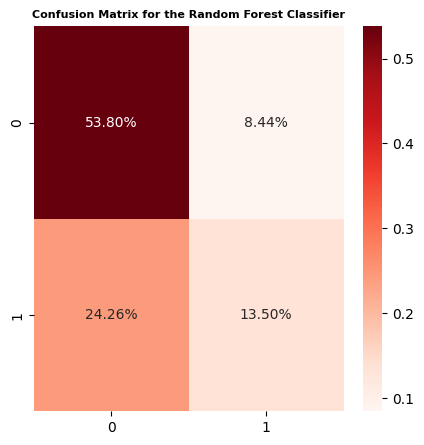


Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.86      0.77       295
           1       0.62      0.36      0.45       179

    accuracy                           0.67       474
   macro avg       0.65      0.61      0.61       474
weighted avg       0.66      0.67      0.65       474



In [72]:
#Modeling Random Forest Classifier for the prediction of interventions
X = df1.drop(['Intervention'],axis=1)
Y = df1['Intervention']


X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=42,test_size=0.3)
rfc=RandomForestClassifier(random_state=42,n_estimators=10)
rfc.fit(X_train,Y_train)
rfc_pred=rfc.predict(X_test)

cm=confusion_matrix(Y_test,rfc_pred)

fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Reds')
ax.set_title('Confusion Matrix for the Random Forest Classifier', fontsize=8, fontweight="bold")
plt.show()

print("\nClassification Report:")
cr=classification_report(Y_test,rfc_pred)
print(cr)


Features relevant to the Random Forest Classifier based on F1-score

In [73]:
#Feature selection using Recursive Feature Elimination (RFE) based on F1 score
best_f1_score = 0
best_num_features = 0
best_selected_features = None

for num_features in range(1, len(X.columns) + 1):
    rfe = RFE(estimator=RandomForestClassifier(random_state=42, n_estimators=10), n_features_to_select=num_features, step=1)
    rfe.fit(X_train, Y_train)

    #Get the selected features
    selected_features = X_train.columns[rfe.support_]

    #Transform X_train and X_test to include only the selected features
    X_train_selected = rfe.transform(X_train)
    X_test_selected = rfe.transform(X_test)

    #Initialize RandomForestClassifier with selected features
    rfc_selected = RandomForestClassifier(random_state=42, n_estimators=10)
    rfc_selected.fit(X_train_selected, Y_train)
    Y_pred = rfc_selected.predict(X_test_selected)

    #Evaluate RandomForestClassifier performance in terms of F1 score
    report = classification_report(Y_test, Y_pred, output_dict=True)
    f1_score = report['weighted avg']['f1-score']

    #Update the best configuration if the current F1 score is higher
    if f1_score > best_f1_score:
        best_f1_score = f1_score
        best_num_features = num_features
        best_selected_features = selected_features

#Print the best configuration and performance
print(f"Best F1 Score: {best_f1_score:.4f}")
print(f"Selected Features: {best_selected_features.tolist()}")


Best F1 Score: 0.6880
Selected Features: ['tempmax', 'tempmin', 'temp', 'feelslike', 'dew', 'humidity', 'precip', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'Precip_last_7D']


Features relevant to the Random Forest Classifier based on Recall score

In [74]:
#Feature selection using Recursive Feature Elimination (RFE) based on Recall score
best_recall_score = 0
best_num_features = 0
best_selected_features = None

for num_features in range(1, len(X.columns) + 1):
    rfe = RFE(estimator=RandomForestClassifier(random_state=42, n_estimators=10), n_features_to_select=num_features, step=1)
    rfe.fit(X_train, Y_train)

    #Get the selected features
    selected_features = X_train.columns[rfe.support_]

    #Transform X_train and X_test to include only the selected features
    X_train_selected = rfe.transform(X_train)
    X_test_selected = rfe.transform(X_test)

    #Initialize RandomForestClassifier with selected features
    rfc_selected = RandomForestClassifier(random_state=42, n_estimators=10)
    rfc_selected.fit(X_train_selected, Y_train)
    Y_pred = rfc_selected.predict(X_test_selected)

    #Evaluate RandomForestClassifier performance in terms of F1 score
    report = classification_report(Y_test, Y_pred, output_dict=True)
    recall_score = report['weighted avg']['recall']

    #Update the best configuration if the current F1 score is higher
    if recall_score > best_recall_score:
        best_recall_score = recall_score
        best_num_features = num_features
        best_selected_features = selected_features

#Print the best configuration and performance
print(f"Best Recall Score: {best_recall_score:.4f}")
print(f"Selected Features: {best_selected_features.tolist()}")

Best Recall Score: 0.7131
Selected Features: ['tempmax', 'tempmin', 'temp', 'feelslike', 'dew', 'humidity', 'precip', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'Precip_last_7D']



Performance of Random Forest Classifier with relevant variables

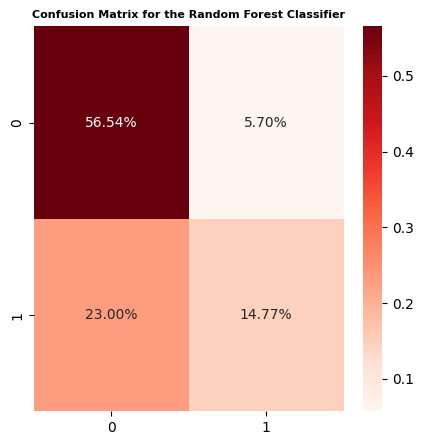


Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.91      0.80       295
           1       0.72      0.39      0.51       179

    accuracy                           0.71       474
   macro avg       0.72      0.65      0.65       474
weighted avg       0.71      0.71      0.69       474



In [75]:
#modeling Random Forest Classifier for the prediction of interventions with the selected features
X = df1[['tempmax', 'tempmin', 'temp', 'feelslike', 'dew', 'humidity', 'precip', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'Precip_last_7D']]
Y = df1['Intervention']

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=42,test_size=0.3)
rfc=RandomForestClassifier(random_state=42,n_estimators=10)
rfc.fit(X_train,Y_train)
rfc_pred=rfc.predict(X_test)

cm=confusion_matrix(Y_test,rfc_pred)
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Reds')
ax.set_title('Confusion Matrix for the Random Forest Classifier', fontsize=8, fontweight="bold")
plt.show()

print("\nClassification Report:")
cr=classification_report(Y_test,rfc_pred)
print(cr)

Method 2 : Logistic Regression

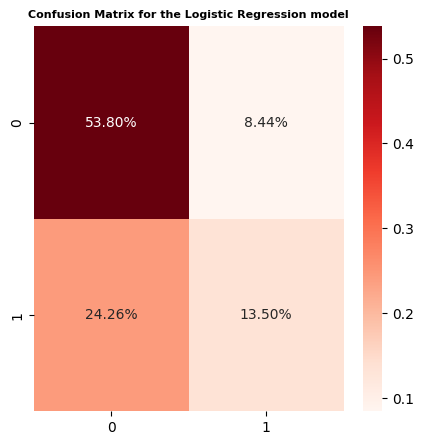


Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.86      0.77       295
           1       0.62      0.36      0.45       179

    accuracy                           0.67       474
   macro avg       0.65      0.61      0.61       474
weighted avg       0.66      0.67      0.65       474



In [76]:
#Modeling Logistic Regression for the prediction of interventions
X = df1.drop(['Intervention'], axis=1)
Y = df1['Intervention']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logistic_classifier = LogisticRegression()
logistic_classifier.fit(X_train_scaled, y_train)
y_pred = logistic_classifier.predict(X_test_scaled)
cm=confusion_matrix(Y_test, Y_pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Reds')
ax.set_title('Confusion Matrix for the Logistic Regression model', fontsize=8, fontweight="bold")
plt.show()

print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))

Features relevant to the Logistic Regression based on F1-score

c:\Users\Manon Pesme\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Manon Pesme\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Manon Pesme\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

Best f1 Score: 0.5071
Selected Features: ['tempmax', 'tempmin', 'temp', 'feelslike', 'dew', 'precip', 'precipprob', 'precipcover', 'snow', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation', 'Weekend', 'Precip_last_7D']


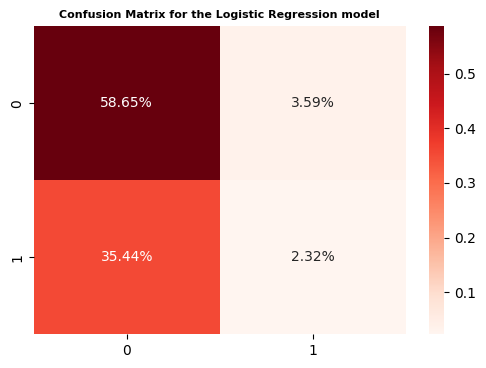

In [77]:
#Modeling Logistic Regression for the prediction of interventions with the selected features based on F1 score
best_f1_score = 0
best_num_features = 0
best_selected_features = None

for num_features in range(1, len(X.columns) + 1):
    logistic_classifier = LogisticRegression()
    
    rfe = RFE(estimator=logistic_classifier, n_features_to_select=num_features, step=1)
    rfe.fit(X_train_scaled, y_train)

    selected_features = X_train.columns[rfe.support_]

    X_train_selected = rfe.transform(X_train_scaled)
    X_test_selected = rfe.transform(X_test_scaled)

    logistic_classifier.fit(X_train_selected, Y_train)

    Y_pred = logistic_classifier.predict(X_test_selected)

    report = classification_report(Y_test, Y_pred, output_dict=True)
    f1_score = report['weighted avg']['f1-score']

    if f1_score > best_f1_score:
        best_f1_score = f1_score
        best_num_features = num_features
        best_selected_features = selected_features

print(f"Best f1 Score: {best_f1_score:.4f}")
print(f"Selected Features: {best_selected_features.tolist()}")

logistic_classifier = LogisticRegression()
rfe = RFE(estimator=logistic_classifier, n_features_to_select=best_num_features, step=1)
rfe.fit(X_train_scaled, Y_train)
selected_features = X_train.columns[rfe.support_]

X_train_selected = rfe.transform(X_train_scaled)
X_test_selected = rfe.transform(X_test_scaled)

logistic_classifier.fit(X_train_selected, Y_train)

Y_pred = logistic_classifier.predict(X_test_selected)

cm = confusion_matrix(Y_test, Y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Reds')
plt.title('Confusion Matrix for the Logistic Regression model', fontsize=8, fontweight="bold")
plt.show()

Features relevant to the Logistic Regression based on Recall score

c:\Users\Manon Pesme\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Manon Pesme\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Manon Pesme\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

Best Recall Score: 0.6266
Selected Features: ['tempmin', 'feelslike', 'dew', 'precipcover', 'Weekend']


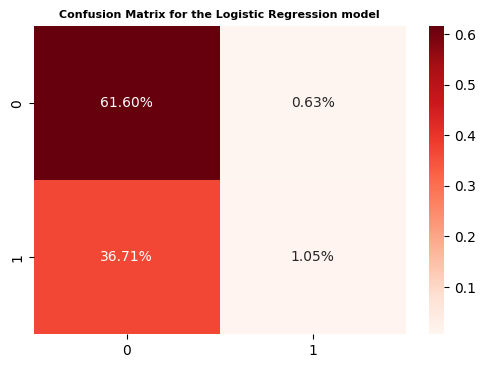

In [78]:
#Modeling Logistic Regression for the prediction of interventions with the selected features based on Recall score
best_recall_score = 0
best_num_features = 0
best_selected_features = None

for num_features in range(1, len(X.columns) + 1):
    logistic_classifier = LogisticRegression()
    
    rfe = RFE(estimator=logistic_classifier, n_features_to_select=num_features, step=1)
    rfe.fit(X_train_scaled, y_train)

    selected_features = X_train.columns[rfe.support_]

    X_train_selected = rfe.transform(X_train_scaled)
    X_test_selected = rfe.transform(X_test_scaled)

    logistic_classifier.fit(X_train_selected, Y_train)

    Y_pred = logistic_classifier.predict(X_test_selected)

    report = classification_report(Y_test, Y_pred, output_dict=True)
    recall_score = report['weighted avg']['recall']

    if recall_score > best_recall_score:
        best_recall_score = recall_score
        best_num_features = num_features
        best_selected_features = selected_features

print(f"Best Recall Score: {best_recall_score:.4f}")
print(f"Selected Features: {best_selected_features.tolist()}")

logistic_classifier = LogisticRegression()
rfe = RFE(estimator=logistic_classifier, n_features_to_select=best_num_features, step=1)
rfe.fit(X_train_scaled, Y_train)
selected_features = X_train.columns[rfe.support_]

X_train_selected = rfe.transform(X_train_scaled)
X_test_selected = rfe.transform(X_test_scaled)

logistic_classifier.fit(X_train_selected, Y_train)

Y_pred = logistic_classifier.predict(X_test_selected)

cm = confusion_matrix(Y_test, Y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Reds')
plt.title('Confusion Matrix for the Logistic Regression model', fontsize=8, fontweight="bold")
plt.show()


Method 3 : SGD classifier

c:\Users\Manon Pesme\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


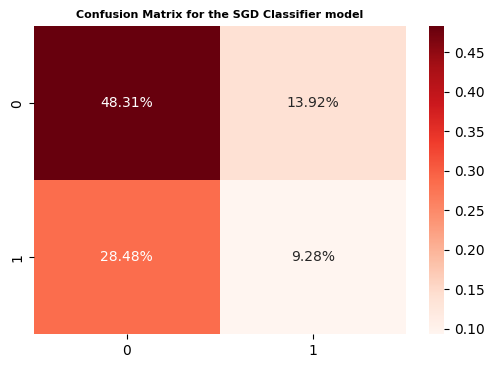


Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.99      0.77       295
           1       0.62      0.03      0.05       179

    accuracy                           0.63       474
   macro avg       0.63      0.51      0.41       474
weighted avg       0.63      0.63      0.50       474



In [79]:
#Modeling SGD Classifier for the prediction of interventions
X = df1.drop(['Intervention'], axis=1)
Y = df1['Intervention']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5, random_state=42)
clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)
cm=confusion_matrix(Y_test, y_pred)
fig, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Reds')
ax.set_title('Confusion Matrix for the SGD Classifier model', fontsize=8, fontweight="bold")
plt.show()

print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))

Features relevant to the SGD Classifier based on f1-score

c:\Users\Manon Pesme\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Manon Pesme\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Manon Pesme\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Manon Pesme\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached be

Best F1 Score: 0.6047
Selected Features: ['temp', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover', 'snow', 'snowdepth', 'windspeed', 'visibility', 'solarenergy', 'severerisk', 'Weekend', 'holidays']


c:\Users\Manon Pesme\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


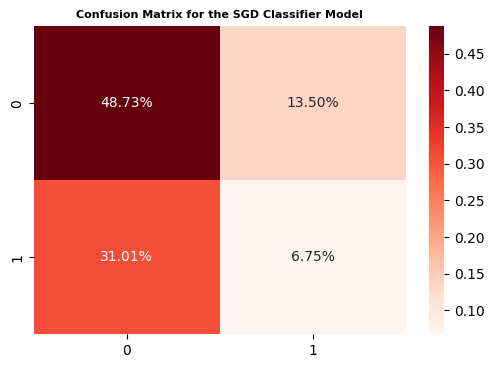

In [80]:
#Selecting the best features using Recursive Feature Elimination (RFE) based on F1 score
best_f1_score = 0
best_num_features = 0
best_selected_features = None

for num_features in range(1, len(X.columns) + 1):
    clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
    rfe = RFE(estimator=clf, n_features_to_select=num_features, step=1)
    rfe.fit(X_train_scaled, Y_train)

    selected_features = X_train.columns[rfe.support_]
    X_train_selected = rfe.transform(X_train_scaled)
    X_test_selected = rfe.transform(X_test_scaled)

    clf.fit(X_train_selected, Y_train)
    Y_pred = clf.predict(X_test_selected)

    report = classification_report(Y_test, Y_pred, output_dict=True)
    f1_score = report['weighted avg']['f1-score']

    if f1_score > best_f1_score:
        best_f1_score = f1_score
        best_num_features = num_features
        best_selected_features = selected_features.tolist()

print(f"Best F1 Score: {best_f1_score:.4f}")
print(f"Selected Features: {best_selected_features}")

#Modeling SGD Classifier for the prediction of interventions with the selected features based on F1 score
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
rfe = RFE(estimator=logistic_classifier, n_features_to_select=best_num_features, step=1)
rfe.fit(X_train_scaled, Y_train)
selected_features = X_train.columns[rfe.support_]

X_train_selected = rfe.transform(X_train_scaled)
X_test_selected = rfe.transform(X_test_scaled)

clf.fit(X_train_selected, Y_train)

Y_pred = clf.predict(X_test_selected)

cm = confusion_matrix(Y_test, Y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Reds')
plt.title('Confusion Matrix for the SGD Classifier Model', fontsize=8, fontweight="bold")
plt.show()

Features relevant to the SGD Classifier based on Recall score

c:\Users\Manon Pesme\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Manon Pesme\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Manon Pesme\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Manon Pesme\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached be

Best Recall Score: 0.6076
Selected Features: ['snow']


c:\Users\Manon Pesme\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


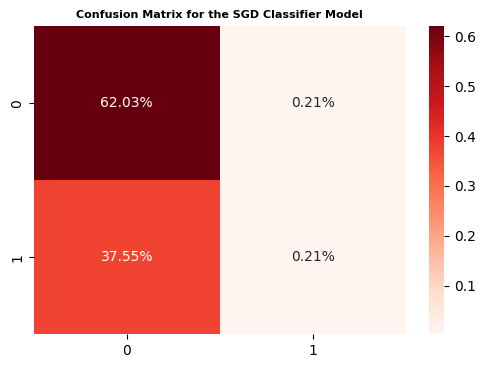

In [81]:
#Selecting the best features using Recursive Feature Elimination (RFE) based on Recall score
best_recall_score = 0
best_num_features = 0
best_selected_features = None

for num_features in range(1, len(X.columns) + 1):
    clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
    rfe = RFE(estimator=clf, n_features_to_select=num_features, step=1)
    rfe.fit(X_train_scaled, Y_train)

    selected_features = X_train.columns[rfe.support_]
    X_train_selected = rfe.transform(X_train_scaled)
    X_test_selected = rfe.transform(X_test_scaled)

    clf.fit(X_train_selected, Y_train)
    Y_pred = clf.predict(X_test_selected)

    report = classification_report(Y_test, Y_pred, output_dict=True)
    f1_score = report['weighted avg']['recall']

    if recall_score > best_recall_score:
        best_recall_score = recall_score
        best_num_features = num_features
        best_selected_features = selected_features.tolist()

print(f"Best Recall Score: {best_recall_score:.4f}")
print(f"Selected Features: {best_selected_features}")


#Modeling Logistic Regression for the prediction of the type of intervention with the selected features based on Recall score
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
rfe = RFE(estimator=logistic_classifier, n_features_to_select=best_num_features, step=1)
rfe.fit(X_train_scaled, Y_train)
selected_features = X_train.columns[rfe.support_]

X_train_selected = rfe.transform(X_train_scaled)
X_test_selected = rfe.transform(X_test_scaled)

clf.fit(X_train_selected, Y_train)

Y_pred = clf.predict(X_test_selected)

cm = confusion_matrix(Y_test, Y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Reds')
plt.title('Confusion Matrix for the SGD Classifier Model', fontsize=8, fontweight="bold")
plt.show()

Conclusion: The Random Forest classifier shows consistency in identifying relevant features based on both the recall score and the F1-score. In contrast, the Logistic Regression and CGD classifiers identify different relevant features depending on the recall score and F1-score, although there are some features common across all three classifiers.

The CGD Classifier and Logistic Regression exhibit lower rates of false negatives compared to the Random Forest. However, the Random Forest significantly outperforms in terms of true positive rates. Therefore, due to its superior F1-score and recall score, I have chosen the Random Forest model

Best parameters: {'n_neighbors': 3}
Best F1-score: 0.5749498187172772


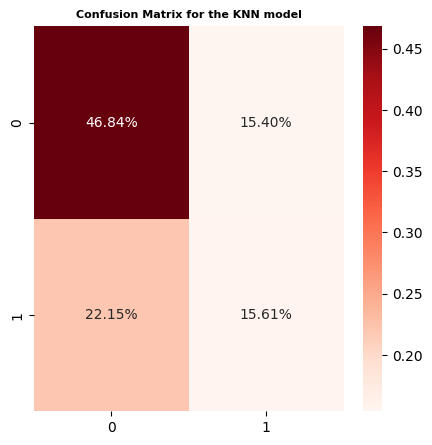


Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.75      0.71       295
           1       0.50      0.41      0.45       179

    accuracy                           0.62       474
   macro avg       0.59      0.58      0.58       474
weighted avg       0.61      0.62      0.62       474



In [82]:
#Test to modeling KNN Classifier for the prediction of the type of intervention based on Recall score
param_grid = {'n_neighbors': list(range(1, 11))}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_train, Y_train)

print("Best parameters:", grid_search.best_params_)
print("Best F1-score:", grid_search.best_score_)

best_knn = grid_search.best_estimator_
Y_pred = best_knn.predict(X_test)

cm=confusion_matrix(Y_test, Y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Reds')
ax.set_title('Confusion Matrix for the KNN model', fontsize=8, fontweight="bold")
plt.show()

print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))


Determine the number of neighbours according to Recall score

Best parameters: {'n_neighbors': 3}
Best Recall score: 0.5740336052836053


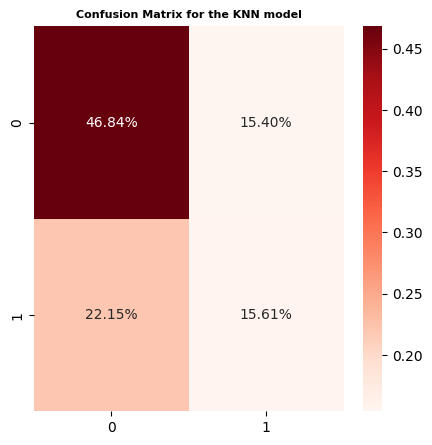


Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.75      0.71       295
           1       0.50      0.41      0.45       179

    accuracy                           0.62       474
   macro avg       0.59      0.58      0.58       474
weighted avg       0.61      0.62      0.62       474



In [83]:
#Test to modeling KNN Classifier for the prediction of the type of intervention based on Recall score
param_grid = {'n_neighbors': list(range(1, 11))}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='recall_macro')
grid_search.fit(X_train, Y_train)

print("Best parameters:", grid_search.best_params_)
print("Best Recall score:", grid_search.best_score_)

best_knn = grid_search.best_estimator_
Y_pred = best_knn.predict(X_test)

cm=confusion_matrix(Y_test, Y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Reds')
ax.set_title('Confusion Matrix for the KNN model', fontsize=8, fontweight="bold")
plt.show()

print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))


**Step5bis: Test to predict 2024**

In [85]:
#Uploading the dataset for the prediction of the type of intervention from 2024
bdd2024 = pd.read_csv('chavannes-près-renens 2024-01-01 to 2024-05-31.csv')

df_2024 = bdd2024.copy()

df_2024=pd.DataFrame(df_2024)

df_2024['datetime']=pd.to_datetime(df_2024['datetime'])
df_2024=df_2024.drop(columns=['name','feelslikemax','feelslikemin','windgust','uvindex','icon','sunrise','sunset','moonphase','stations'])
df_2024['Weekend']=df_2024['datetime'].dt.dayofweek // 5
df_2024['Weekend']=df_2024['Weekend'].astype(str)
df_2024['Precip_last_7D'] = df_2024.rolling(window="7D", on='datetime')['precip'].sum()
df_2024['preciptype'].fillna('Rien', inplace=True)
df_2024['visibility'].fillna(0, inplace=True)
df_2024['severerisk'].fillna(0, inplace=True)

C:\Users\Manon Pesme\AppData\Local\Temp\ipykernel_22108\2462628027.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_2024['preciptype'].fillna('Rien', inplace=True)
C:\Users\Manon Pesme\AppData\Local\Temp\ipykernel_22108\2462628027.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [86]:
#Add the holidays column in the dataset of 2024
hol = pd.read_excel('Vacances_scolaires.xlsx')
def check_holidays(datetime):
    return any(start_date <= datetime <= end_date for start_date, end_date in zip(hol['start_date'], hol['end_date']))

df_2024['holidays'] = df_2024['datetime'].apply(check_holidays).astype(int)

*Save Random Forest Model to predict 2024*

In [91]:
#Using the model Random Forest to predict the type of intervention in 2024 with the selected features
X = df1[['tempmax', 'tempmin', 'temp', 'feelslike', 'dew', 'humidity', 'precip', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'Precip_last_7D']]
Y = df1['Intervention']

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=42,test_size=0.3)
model=RandomForestClassifier(random_state=42,n_estimators=10)
model.fit(X_train,Y_train)

# Save the model
joblib.dump(model, 'model_2024.pkl')

['model_2024.pkl']

In [94]:
X_2024 = df_2024[['tempmax', 'tempmin', 'temp', 'feelslike', 'dew', 'humidity', 'precip', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'Precip_last_7D']]
#Load the model
model = joblib.load('model_2024.pkl')

#Load the dataset meterological for 2024
df_2024 = pd.read_csv('BDD_2024.csv')
predictions = model.predict(X_2024)

# Save the predictions to a CSV file
predictions_df = pd.DataFrame({
    'datetime': df_2024['datetime'],
    'Predictions': predictions
})
predictions_df.to_csv('predictions_2024.csv', index=False)

In [125]:
#Uploading the dataset of interventions for 2024
bdd_intervention2024 = pd.read_excel('alarmes_2024.xlsx')
interventions2024=bdd_intervention2024.copy()
interventions2024['Date début alarmes'] = interventions2024['Date début alarmes'].apply(lambda x: dateparser.parse(x).strftime('%Y-%m-%d'))
interventions2024['Date fin alarme'] = interventions2024['Date fin alarme'].apply(lambda x: dateparser.parse(x).strftime('%Y-%m-%d'))
interventions2024 = interventions2024.drop_duplicates()
interventions2024['Intervention'] = 1

interventions2024.to_csv('alarmes_good_2024.csv', index=False,encoding='latin1')

Date début alarmes    object
Heure début alarme    object
Date fin alarme       object
Heure fin alarmes     object
Numéro                 int64
Type                  object
Description           object
Commune               object
Intervention           int64
dtype: object

*Look Match between alarmes in 2024 and 2024 predictions from my model*

In [130]:
# Load excel file
predictions2024 = pd.read_csv('predictions_2024.csv')
# date predictions with interventions
predictions2024_1 = predictions2024[predictions2024['Predictions']==1]
print(predictions2024_1.shape)
print(interventions2024.shape)

#Observe the dates of the predictions that match the dates of the interventions
date_match =predictions2024_1[predictions2024_1['datetime'].isin(interventions2024['Date début alarmes'])]
print(date_match)


(23, 2)
(52, 9)
       datetime  Predictions
15   2024-01-16            1
39   2024-02-09            1
83   2024-03-24            1
100  2024-04-10            1
121  2024-05-01            1
139  2024-05-19            1
141  2024-05-21            1


**Step 6 : Consideration of Adversarial Attacks**

**Step 7: Discussion and Conclusion**